In [1]:
from itertools import combinations, permutations
from math import factorial, ceil, floor

# permutations does not scale well and we can exploit the fact that the order of the 4 queens does not matter 
def gen_combinations():
    # 4 queens (order does not matter) + 1 bishop
    res = []
    for c in combinations(range(0, 64), 4):
        for i in [elem for elem in list(range(0, 64)) if not elem in list(c)]:
            res.append(c + (i,))
    return res
    # return permutations(range(0, 64), 5) 
    # order actually matters (at least for the 4 first) 
    # return combinations(list(range(0, 64)), 5) 

# assert(len(list(gen_combinations())) == (factorial(64) / (factorial(64 - 5) * factorial(5))))
# assert(len(list(gen_combinations())) == (factorial(64) / (factorial(64 - 5))))

# combinations of 4 among 64, and then 60 remaining possibilities
assert(len(gen_combinations()) == (factorial(64) / (factorial(64 - 4) * factorial(4))) * 60)

In [2]:
(factorial(64) / (factorial(64 - 4) * factorial(4))) * 60

38122560.0

In [3]:
def to_coordinates(q):
    x = q - (floor(q / 8) * 8)
    y = floor(q / 8)    
    return (x, y)

assert(to_coordinates(63) == (7, 7))
assert(to_coordinates(28) == (4, 3))
assert(to_coordinates(1) == (1, 0))
assert(to_coordinates(0) == (0, 0))
assert(to_coordinates(7) == (7, 0))
assert(to_coordinates(56) == (0, 7))

In [4]:
def add_x(t, m): # a tuple
    x = t[0]
    y = t[1]
    return (x+m, y)

def add_y(t, m): # a tuple
    x = t[0]
    y = t[1]
    return (x, y+m)

def is_casein_chessboard(t): # a tuple
    x = t[0]
    y = t[1]
    return x >= 0 and x <= 7 and y >= 0 and y <= 7

def horizontal_directions(q):
    def horizontal_direction(q, north=True):
        norths = []
        qcase = to_coordinates(q)
        for i in range(1, 8):
            if north:
                possible_move = add_y(qcase, i)
            else:
                possible_move = add_y(qcase, -i)
            if (not is_casein_chessboard(possible_move)):
                break
            x = possible_move[0]
            y = possible_move[1]
            norths.append(x*8 + y)
        return norths
    n = horizontal_direction(q, True)
    s = horizontal_direction(q, False)
    return n + s

def vertical_directions(q):
    def vertical_direction(q, east=True):
        eaths = []
        qcase = to_coordinates(q)
        for i in range(1, 8):
            if east:
                possible_move = add_x(qcase, i)
            else:
                possible_move = add_x(qcase, -i)
            if (not is_casein_chessboard(possible_move)):
                break
            x = possible_move[0]
            y = possible_move[1]
            eaths.append(x*8 + y)
        return eaths

    w = vertical_direction(q, True)
    e = vertical_direction(q, False)
    return e + w



def diagup(q):
    def diagup_direction(q, east=True):
        eaths = []
        qcase = to_coordinates(q)
        for i in range(1, 8):
            if east:
                possible_move = add_y(qcase, i)
                possible_move = add_x(possible_move, i)
            else:
                possible_move = add_y(qcase, i)
                possible_move = add_x(possible_move, -i)
            if (not is_casein_chessboard(possible_move)):
                break
            x = possible_move[0]
            y = possible_move[1]
            eaths.append(x*8 + y)
        return eaths
    w = diagup_direction(q, True)
    e = diagup_direction(q, False)
    return e + w


def diagdown(q):
    def diagdown_direction(q, east=True):
        eaths = []
        qcase = to_coordinates(q)
        for i in range(1, 8):
            if east:
                possible_move = add_y(qcase, -i)
                possible_move = add_x(possible_move, i)
            else:
                possible_move = add_y(qcase, -i)
                possible_move = add_x(possible_move, -i)
            if (not is_casein_chessboard(possible_move)):
                break
            x = possible_move[0]
            y = possible_move[1]
            eaths.append(x*8 + y)
        return eaths
    s = diagdown_direction(q, True)
    n = diagdown_direction(q, False)
    return s + n

def squares_covered_byqueen(q):
    horizontals = horizontal_directions(q)
    verticals = vertical_directions(q)
    diagsup = diagup(q)
    diagsdown = diagdown(q)
    
    return [q] + horizontals + verticals + diagsup + diagsdown

def squares_covered_bybishop(q):
    diagsup = diagup(q)
    diagsdown = diagdown(q)
    return [q] + diagsup + diagsdown

print("0", sorted(squares_covered_byqueen(0)))
print("1", squares_covered_byqueen(1))
print("63", squares_covered_byqueen(63))
print("13", squares_covered_byqueen(13))
print("28", squares_covered_byqueen(28))

len(squares_covered_byqueen(0))

assert(len(squares_covered_byqueen(0)) == (1+7+7+7))
assert(len(squares_covered_byqueen(63)) == (1+7+7+7))
assert(len(squares_covered_byqueen(1)) == (1+7+7+6+1))
assert(len(squares_covered_byqueen(28)) == (1+7+7+7+6))

assert(len(squares_covered_bybishop(28)) == (1+7+6))
assert(len(squares_covered_bybishop(0)) == (1+7))
# let's go metamorphic ;)
assert(len(squares_covered_bybishop(0)) == len(squares_covered_bybishop(63)))
assert(len(squares_covered_bybishop(56)) == len(squares_covered_bybishop(7)))
# diagup_direction(0), diagup_direction(7, False), diagup_direction(4, False), diagup_direction(4, True), diagup_direction(63, False)
# diagup(28), diagdown_direction(28), diagdown_direction(28, False)
# [mult_coordinates((0, 1), i) for i in range(0, 8)], [add_coordinates((0, 0), i*8) for i in range(0, 8)]

0 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 16, 18, 24, 27, 32, 36, 40, 45, 48, 54, 56, 63]
1 [1, 9, 10, 11, 12, 13, 14, 15, 0, 16, 24, 32, 40, 48, 56, 1, 17, 26, 35, 44, 53, 62]
63 [63, 62, 61, 60, 59, 58, 57, 56, 55, 47, 39, 31, 23, 15, 7, 54, 45, 36, 27, 18, 9, 0]
13 [13, 42, 43, 44, 45, 46, 47, 40, 33, 25, 17, 9, 1, 49, 57, 34, 27, 20, 13, 6, 50, 59, 48, 32]
28 [28, 36, 37, 38, 39, 34, 33, 32, 27, 19, 11, 3, 43, 51, 59, 28, 21, 14, 7, 44, 53, 62, 42, 49, 56, 26, 17, 8]


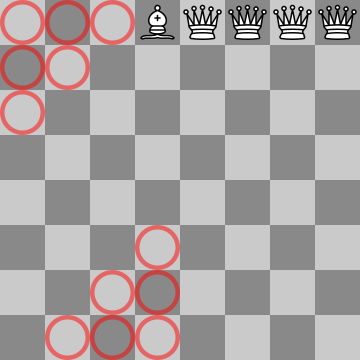

In [17]:
import chess
import chess.svg

def nbcases_covered(cmb):
    squares = []
    for q in range(0, 4):
        squares = squares + squares_covered_byqueen(cmb[q], cmb) # TODO
    bischop_case = cmb[4]
    squares = squares + squares_covered_bybishop(bischop_case, cmb) # TODO
    return len(set(squares))

def display_chessboard(cmb):
    board = chess.Board() 
    board.clear_board()
    
    for q in range(0, 4):
        board.set_piece_at(cmb[q], chess.Piece(chess.QUEEN, color=True))
    board.set_piece_at(cmb[4], chess.Piece(chess.BISHOP, color=True))
    squares = []
    for q in range(0, 4):
        squares = squares + list(board.attacks(cmb[q]))
    squares = set(squares + list(board.attacks(cmb[4])))
    for q in range(0, 5):
        if cmb[q] in squares:
            squares.remove(cmb[q])
    circles = [chess.svg.Arrow(i, i, color="red") for i in range(0, 63) if i not in squares and i not in cmb]
    # https://python-chess.readthedocs.io/en/latest/svg.html
    # squares=chess.SquareSet(squares), 
    return chess.svg.board(board=board, arrows=circles, coordinates=False, style='''
.square.light {
fill: #cacaca;
}
.square.dark {
fill: #898989;
}
#xx {
fill: blue;
stroke: red;
}
.square.light.lastmove {
fill: #c3d889;
}
.square.dark.lastmove {
fill: #92b167;
}
.check {
fill: url(#check_gradient);
}
.arrow {
stroke: #ff5858;
fill: blue;
}
.mark {
stroke: #959fff;
fill: blue;
}
''')  # doctest: +SKIP
    # return chess.svg.board(board=board)  # doctest: +SKIP

#recorded_solutions_percases = {}
#ntries = 0
#for cmb in gen_combinations():
#    n = nbcases_covered(cmb)
#    recorded_solutions_percases[n] = cmb
#    ntries = ntries + 1
    # if (n >= 64): # the solution(s)
    # if n <= 42: # sounds incredible
#    if ntries == 10000000: # monitor a bit 
#        print("alive!")
#        print(cmb, "=>", n, ntries)

display_chessboard(cmb)


40


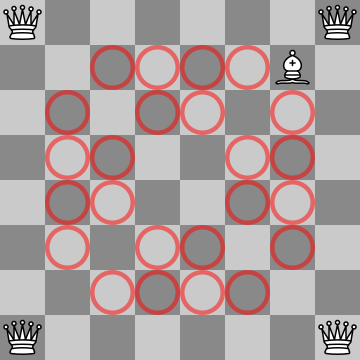

42


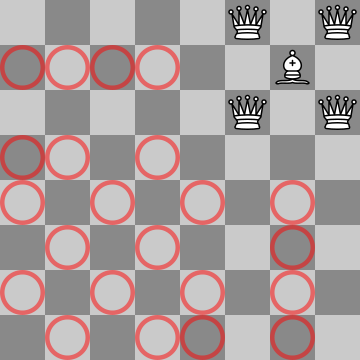

43


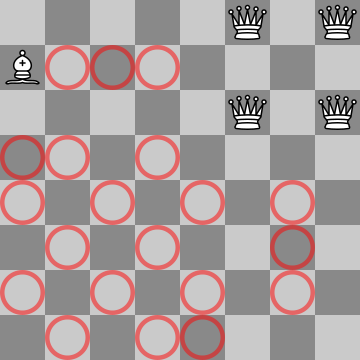

44


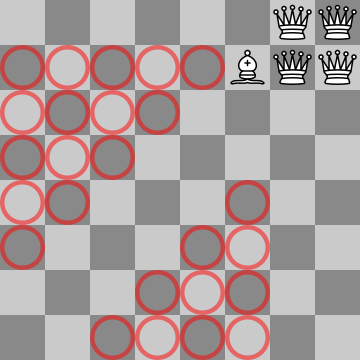

45


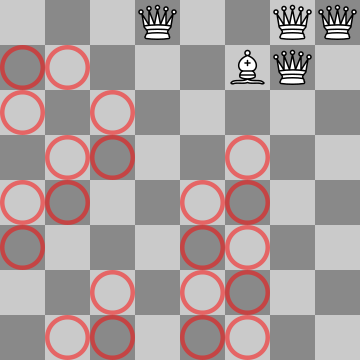

46


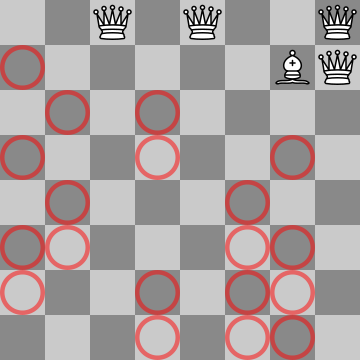

47


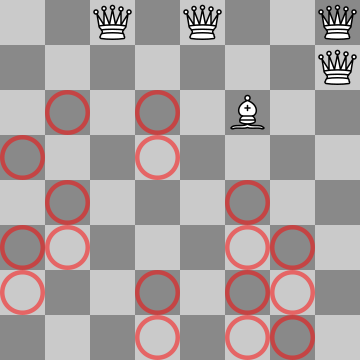

48


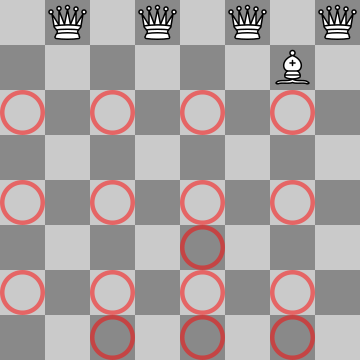

49


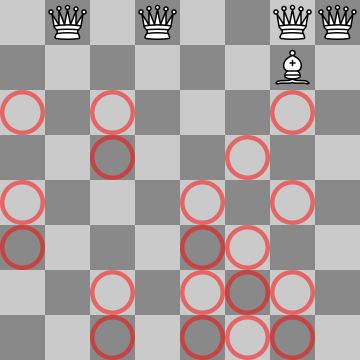

50


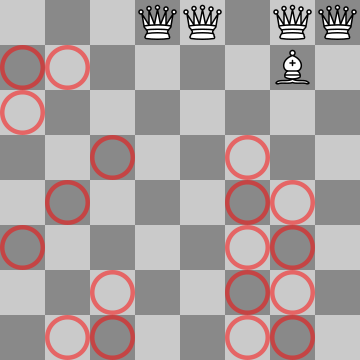

51


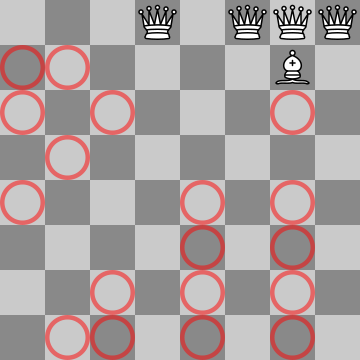

52


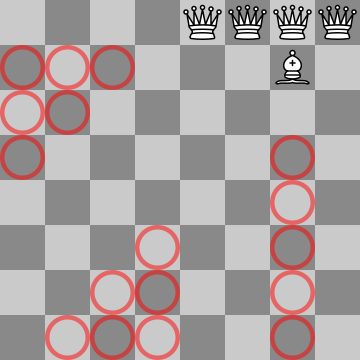

53


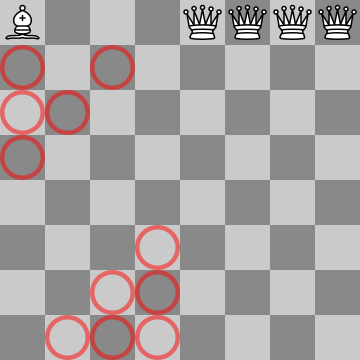

54


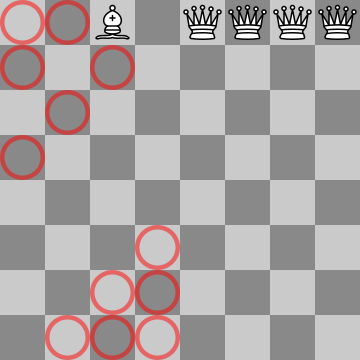

55


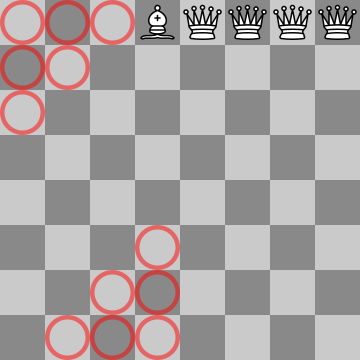

56


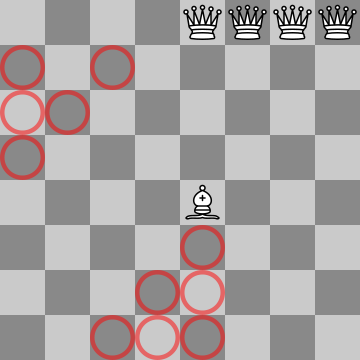

57


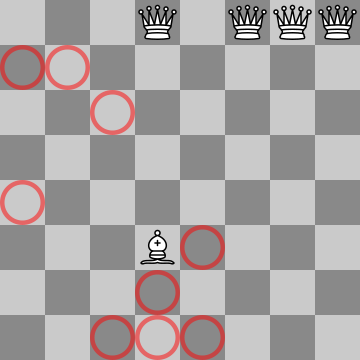

58


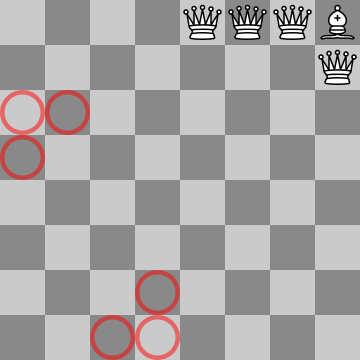

59


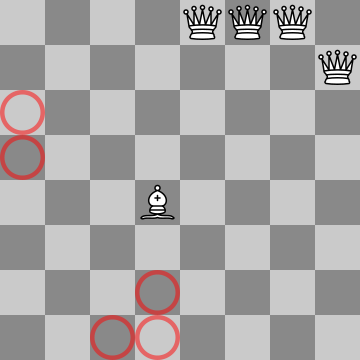

60


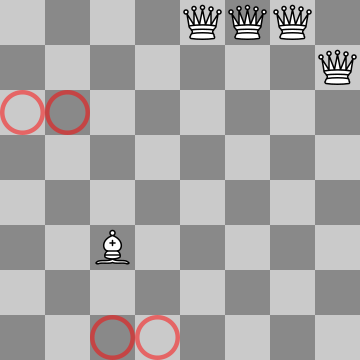

61


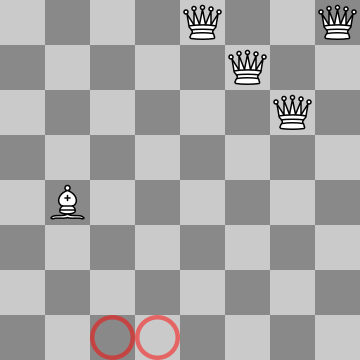

62


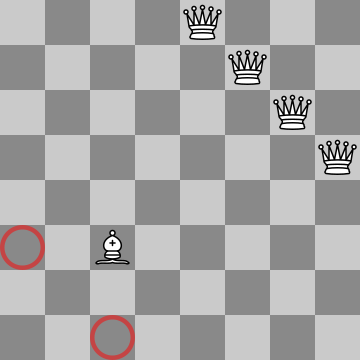

63


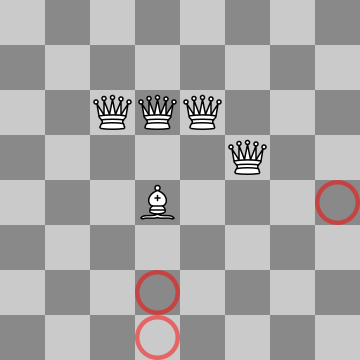

64


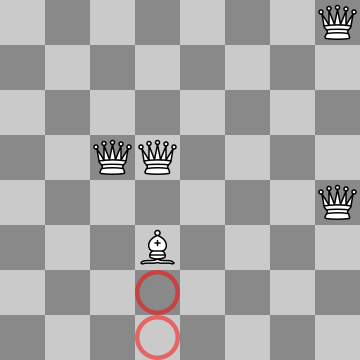

In [18]:
# display_chessboard(cmb)
import chess
import chess.svg
from IPython.display import SVG, display

recorded_solutions_percases, ntries

for k in sorted(recorded_solutions_percases):
    print(k)
    display(SVG(display_chessboard(recorded_solutions_percases[k])))
    with open('chess-try' + str(k) + '.svg', 'w') as f:
        f.write(display_chessboard(recorded_solutions_percases[k]))

In [29]:
def nbcases_covered2(cmb):
    board = chess.Board() 
    board.clear_board()
    
    for q in range(0, 4):
        board.set_piece_at(cmb[q], chess.Piece(chess.QUEEN, color=True))
    board.set_piece_at(cmb[4], chess.Piece(chess.BISHOP, color=True))  
    
    squares = []
    for q in range(0, 5):
        squares.append(cmb[q])
        squares = squares + list(board.attacks(cmb[q]))
    # squares = set(squares + list(board.attacks(cmb[4])))
    return len(set(squares))

recorded_solutions_percases = {}
ntries = 0
for cmb in gen_combinations():
    n = nbcases_covered2(cmb)
    recorded_solutions_percases[n] = cmb
    ntries = ntries + 1
    if (n > 63): # the solution(s)
        print(cmb, "=>", n, ntries)
    # if n <= 42: # sounds incredible
    if ntries == 10000000: # monitor a bit 
        print("alive!")
#        print(cmb, "=>", n, ntries)


(0, 6, 29, 51, 3) => 64 592623
(0, 12, 39, 57, 24) => 64 1116203
(0, 12, 39, 57, 42) => 64 1116220
(0, 12, 39, 57, 51) => 64 1116229
(0, 12, 44, 52, 15) => 64 1122194
(0, 12, 44, 52, 22) => 64 1122201
(0, 12, 44, 52, 29) => 64 1122208
(0, 12, 44, 52, 36) => 64 1122215
(0, 12, 44, 52, 57) => 64 1122234
(0, 15, 33, 60, 3) => 64 1318563
(0, 15, 33, 60, 21) => 64 1318580
(0, 15, 33, 60, 30) => 64 1318589
(0, 15, 35, 44, 25) => 64 1321044
(0, 15, 35, 44, 61) => 64 1321078
(0, 20, 28, 60, 15) => 64 1606275
(0, 20, 28, 60, 36) => 64 1606294
(0, 20, 28, 60, 43) => 64 1606301
(0, 20, 28, 60, 50) => 64 1606308
(0, 20, 28, 60, 57) => 64 1606315
(0, 20, 38, 50, 25) => 64 1623384
(0, 20, 38, 50, 43) => 64 1623401
(0, 20, 38, 50, 61) => 64 1623418
(0, 22, 34, 52, 11) => 64 1717991
(0, 22, 34, 52, 29) => 64 1718008
(0, 22, 34, 52, 47) => 64 1718025
(0, 28, 37, 43, 17) => 64 1969217
(0, 28, 37, 43, 26) => 64 1969226
(0, 28, 37, 43, 53) => 64 1969250
(0, 28, 37, 43, 62) => 64 1969259
(0, 28, 37, 57, 11

(11, 23, 33, 54, 7) => 64 21259568
(11, 23, 33, 54, 28) => 64 21259587
(11, 23, 33, 54, 42) => 64 21259600
(11, 23, 33, 54, 56) => 64 21259613
(11, 29, 41, 63, 16) => 64 21506116
(11, 29, 41, 63, 34) => 64 21506133
(11, 29, 41, 63, 52) => 64 21506150
(11, 30, 49, 61, 0) => 64 21546061
(11, 30, 49, 61, 18) => 64 21546078
(11, 30, 49, 61, 36) => 64 21546095
(11, 30, 49, 61, 63) => 64 21546120
(11, 31, 41, 61, 0) => 64 21567421
(11, 31, 41, 61, 18) => 64 21567438
(11, 31, 41, 61, 36) => 64 21567455
(11, 31, 41, 61, 54) => 64 21567472
(11, 31, 41, 61, 63) => 64 21567480
(11, 31, 45, 57, 34) => 64 21571893
(11, 37, 56, 62, 59) => 64 21721737
(12, 16, 38, 49, 0) => 64 22136761
(12, 16, 38, 49, 27) => 64 22136786
(12, 16, 38, 49, 45) => 64 22136803
(12, 16, 38, 49, 63) => 64 22136820
(12, 20, 52, 56, 1) => 64 22384322
(12, 20, 52, 56, 28) => 64 22384347
(12, 20, 52, 56, 37) => 64 22384356
(12, 20, 52, 56, 46) => 64 22384365
(12, 20, 52, 56, 55) => 64 22384373
(12, 24, 42, 62, 37) => 64 225675

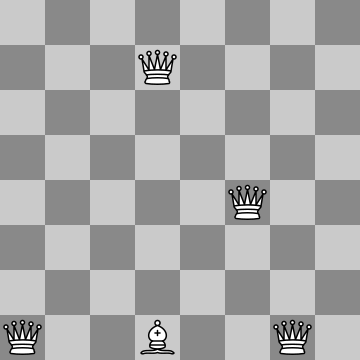

In [27]:
display_chessboard((0, 6, 29, 51, 3))

In [30]:
recorded_solutions_percases, ntries

({52: (60, 61, 62, 63, 59),
  53: (60, 61, 62, 63, 57),
  51: (60, 61, 62, 63, 55),
  47: (60, 61, 62, 63, 54),
  48: (60, 61, 62, 63, 52),
  55: (60, 61, 62, 63, 50),
  54: (60, 61, 62, 63, 49),
  50: (60, 61, 62, 63, 47),
  56: (60, 61, 62, 63, 41),
  49: (60, 61, 62, 63, 39),
  46: (59, 61, 62, 63, 54),
  45: (57, 61, 62, 63, 54),
  43: (55, 61, 62, 63, 54),
  44: (57, 59, 61, 63, 45),
  57: (55, 61, 62, 63, 33),
  39: (54, 61, 62, 63, 53),
  58: (55, 60, 61, 62, 63),
  59: (55, 60, 61, 62, 27),
  42: (55, 60, 62, 63, 54),
  60: (55, 60, 61, 62, 18),
  61: (47, 54, 60, 61, 17),
  41: (54, 55, 60, 63, 46),
  62: (46, 53, 60, 63, 25),
  63: (36, 37, 38, 49, 17),
  64: (26, 27, 31, 56, 55),
  40: (53, 60, 61, 62, 52)},
 38122560)

39


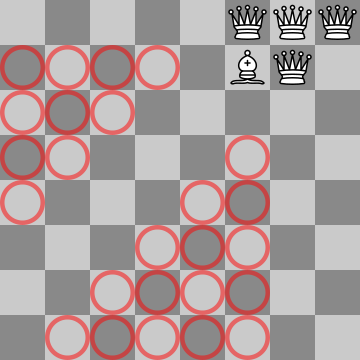

40


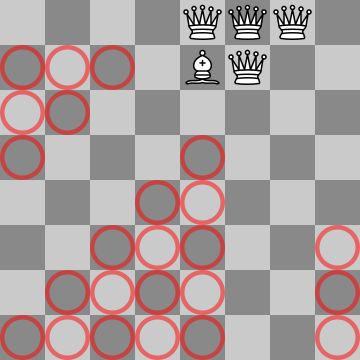

41


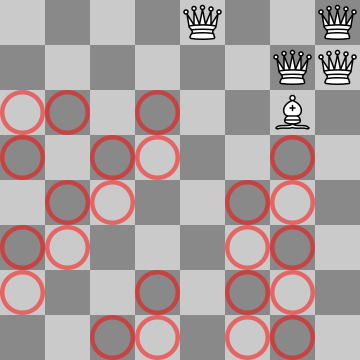

42


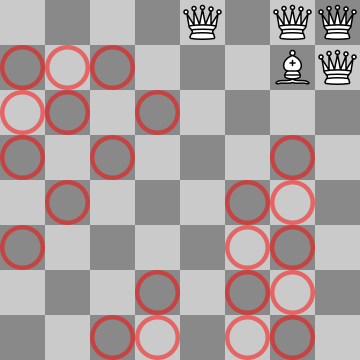

43


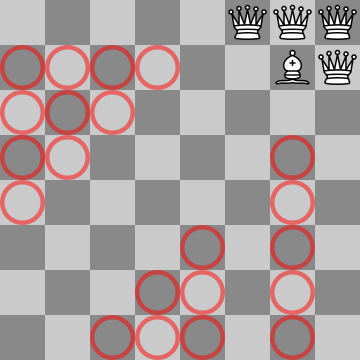

44


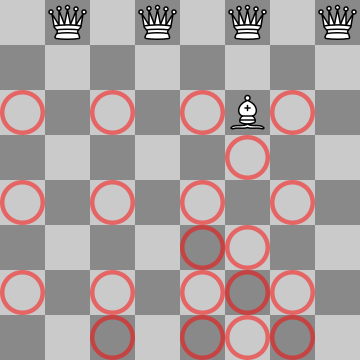

45


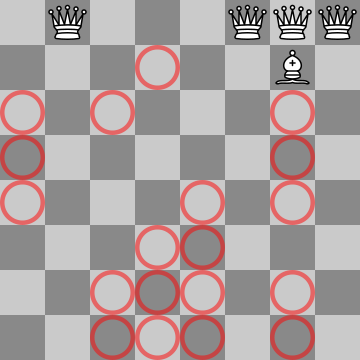

46


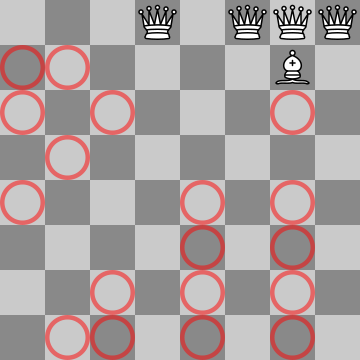

47


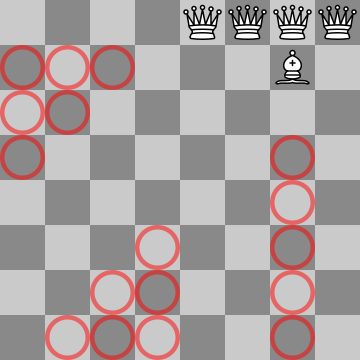

48


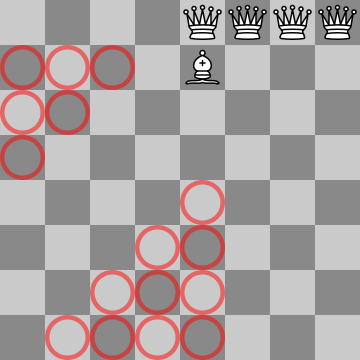

49


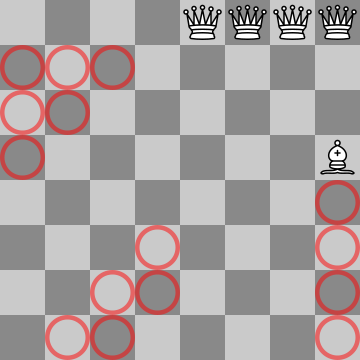

50


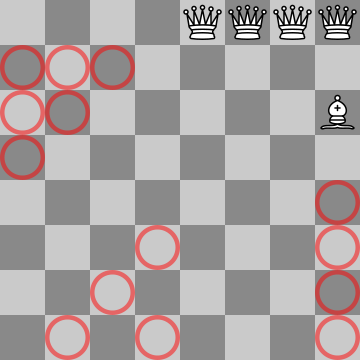

51


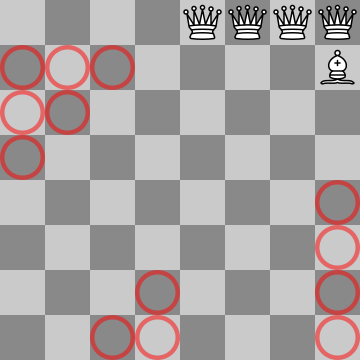

52


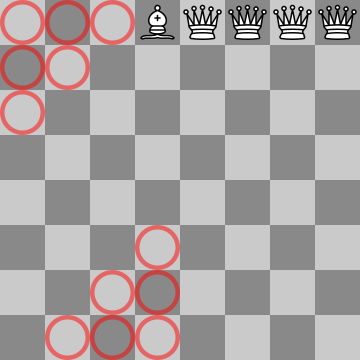

53


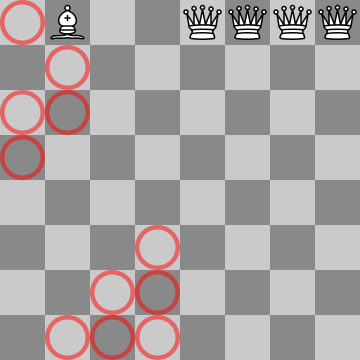

54


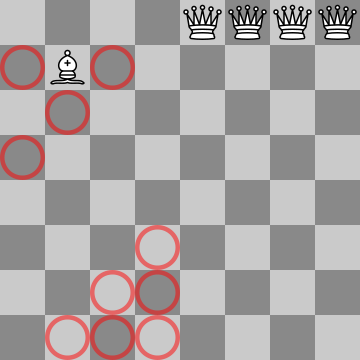

55


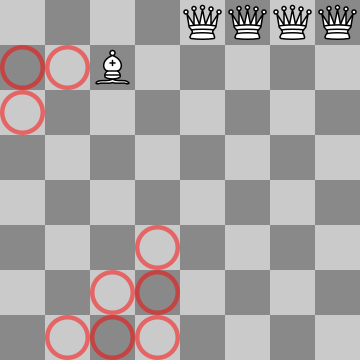

56


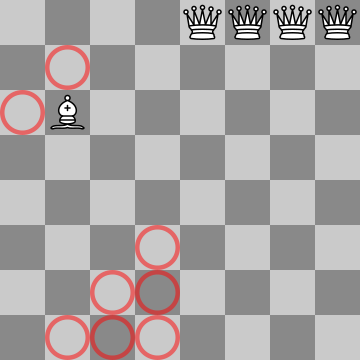

57


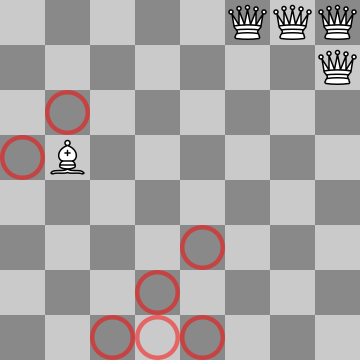

58


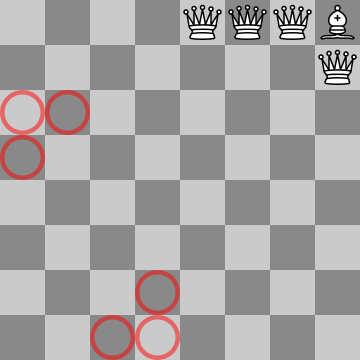

59


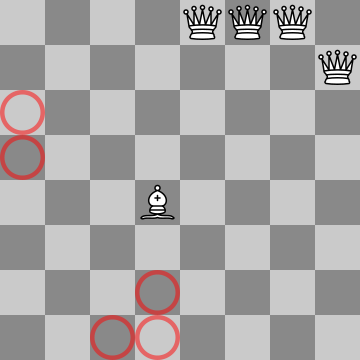

60


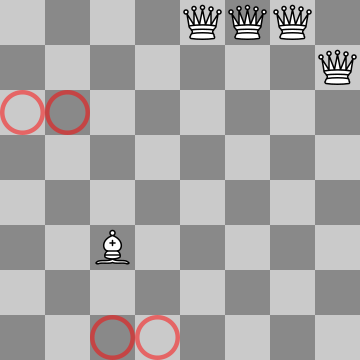

61


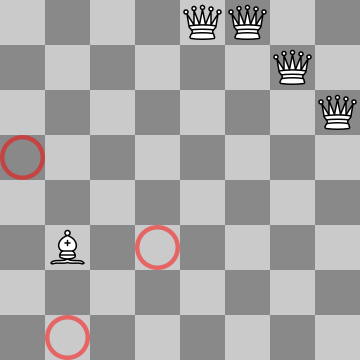

62


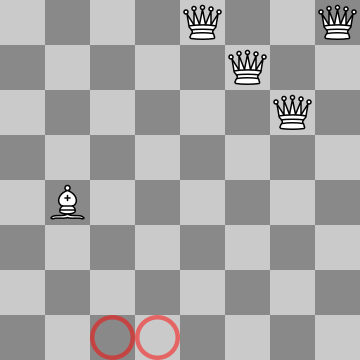

63


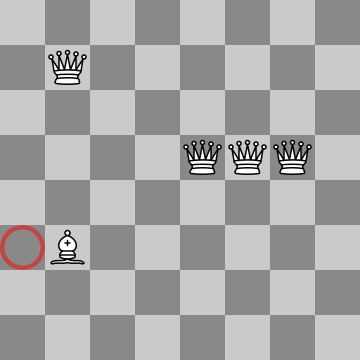

64


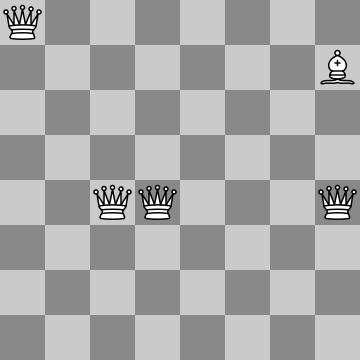

In [31]:
# display_chessboard(cmb)
import chess
import chess.svg
from IPython.display import SVG, display

recorded_solutions_percases, ntries

for k in sorted(recorded_solutions_percases):
    print(k)
    display(SVG(display_chessboard(recorded_solutions_percases[k])))
    with open('chess-try' + str(k) + '.svg', 'w') as f:
        f.write(display_chessboard(recorded_solutions_percases[k]))